In [56]:
import copy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.keys())
%matplotlib inline

In [2]:
#sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")

In [65]:
data_file = 'CB839_Glu-rescue_143B-SLC1A3.xlsx'
df = pd.read_excel(data_file)
df = df.sort_values(by=['Rescue', 'Conc'], ascending=[False, True]).reset_index(drop=True)

In [66]:
rescue = 'Vehicle'
mask = df_norm['Rescue'] == rescue
mask0 =  (df['Rescue'] == rescue) & (df['Conc'] == 0)
df.loc[mask, 'Prlfr_norm'] = df.loc[mask, 'Prlfr'] / df[mask0]['Prlfr'].values[0]

rescue = 'Glu'
mask = df_norm['Rescue'] == rescue
mask0 =  (df['Rescue'] == rescue) & (df['Conc'] == 0)
df.loc[mask, 'Prlfr_norm'] = df.loc[mask, 'Prlfr'] / df[mask0]['Prlfr'].values[0]

In [67]:
df

,Rescue,Conc,Prlfr,Prlfr_norm
0,Vehicle,0,0.857017,1.000000
1,Vehicle,1,0.996625,1.162900
2,Vehicle,10,0.800975,0.934608
3,Vehicle,100,0.215290,0.251209
4,Vehicle,1000,0.099544,0.116152
5,Vehicle,10000,-0.366162,-0.427252
6,Glu,0,1.255652,1.000000
7,Glu,1,1.332998,1.061598
8,Glu,10,1.254043,0.998719
9,Glu,100,1.297339,1.033200


In [ ]:
g1.legend_.get_d

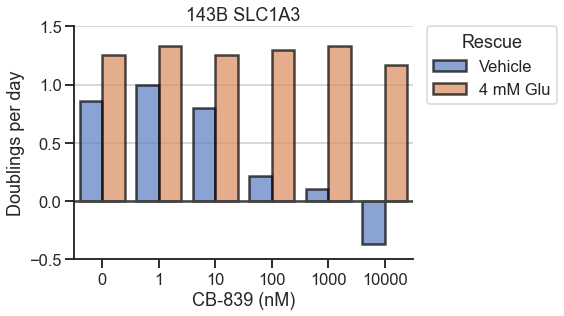

In [100]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4.5))

g1 = sns.barplot(y='Prlfr', x='Conc', hue='Rescue', data=df, edgecolor='black', linewidth=2.5, alpha=0.7)
g1.set_ylabel('Doublings per day');
g1.set_xlabel('CB-839 (nM)');
handles, labels = g1.get_legend_handles_labels()
labels = ['Vehicle', '4 mM Glu']
g1.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0, title='Rescue', labels=labels, handles=handles)
g1.grid(True, axis='y')
g1.set_ylim(bottom=-0.5, top=1.5);
g1.set_title('143B SLC1A3')
ax1.axhline(y=0, linestyle='-', zorder=1, linewidth=2.5, color='#444444')
sns.despine()
plt.tight_layout()
fig.savefig('CB-titration.pdf')

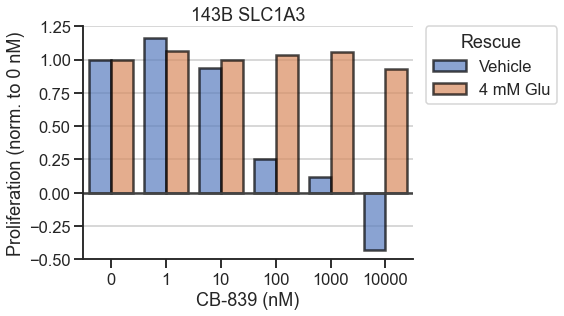

In [98]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4.5))

g1 = sns.barplot(y='Prlfr_norm', x='Conc', hue='Rescue', data=df, edgecolor='black', linewidth=2.5, alpha=0.7)
g1.set_ylabel('Proliferation (norm. to 0 nM)');
g1.set_xlabel('CB-839 (nM)');
handles, labels = g1.get_legend_handles_labels()
labels = ['Vehicle', '4 mM Glu']
g1.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0, title='Rescue', labels=labels, handles=handles)
g1.grid(True, axis='y')
g1.set_ylim(bottom=-0.5, top=1.25);
g1.set_title('143B SLC1A3')
ax1.axhline(y=0, linestyle='-', zorder=1, linewidth=2.5, color='#444444')
sns.despine()
plt.tight_layout()
fig.savefig('CB-titration_norm.pdf')